In [50]:
import os
import sys

current_path = os.getcwd()
sys.path.append(current_path + '\..\project1')

import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Import self-made modules
from linear_model import LinearModel
from make_data import FrankeFunction
from prepare_data import create_design_matrix
from error_metrics import R2, MSE

In [51]:
x = np.random.rand(100)
z = 2.0 + 3*x + 5*x*x + 0.5*np.random.randn(100)

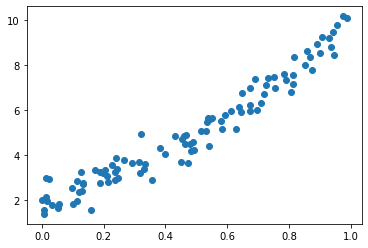

In [52]:
plt.scatter(x, z)

In [53]:
X = pd.DataFrame()
for i in range(0, 7):
    X['x^' + str(i)] = x**i


In [54]:
mses = []
mses_train = []
r2s = []
r2s_train = []

# Train and test model for different polynomial derees
for i in range(1, 12):
    X = pd.DataFrame()
    for i in range(0, i+1):
        X['x^' + str(i)] = x**i
    
    # Split data in train and test
    X_train, X_test, z_train, z_test = train_test_split(X, z, test_size = 0.2)
    
    # Train model
    lr = LinearModel()
    lr.fit(X_train, z_train)
    
    # Made predictions on train and test set
    z_pred_test = lr.predict(X_test)
    z_pred_train = lr.predict(X_train)
    
    # Calculate errors for test set
    mses.append(MSE(z_test, z_pred_test))
    r2s.append(R2(z_test, z_pred_test))
    
    # Calculate errors for train set
    mses_train.append(MSE(z_train, z_pred_train))
    r2s_train.append(R2(z_train, z_pred_train)) 

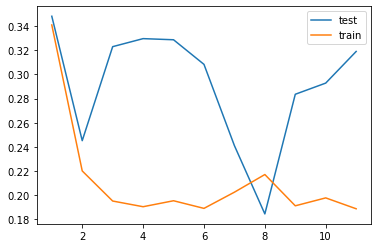

In [55]:
plt.plot(range(1, 12), mses, label='test')
plt.plot(range(1, 12), mses_train, label='train')
plt.legend()